<a href="https://colab.research.google.com/github/Lakshmijp/Assignment-01/blob/main/Case_study_on_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Case Study on Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('car_age_price.csv')

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
data.shape


(112, 2)

In [7]:
data.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


In [9]:
data.isna().sum()

Year     0
Price    0
dtype: int64

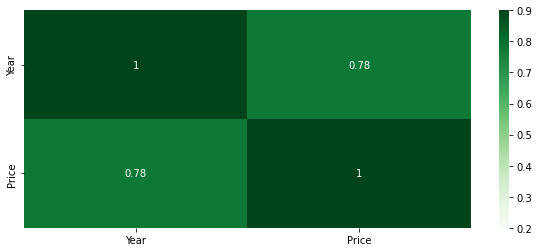

In [12]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=0.2,vmax=0.9,annot=True,cmap='Greens')

In [13]:
data.columns

Index(['Year', 'Price'], dtype='object')

Linear regression

In [14]:
y=data['Price']
x=data.drop(['Price'],axis=1)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [18]:
x_test

,Year
40,2019
65,2017
4,2018
47,2018
42,2018
69,2015
26,2017
11,2018
10,2019
44,2019


In [19]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [20]:
predictions

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [21]:
from sklearn.metrics import mean_squared_error,r2_score

In [22]:
print('Mean squared error is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

Mean squared error is: 4326906256.829671
R squared value is: 0.36759313425902185


<function matplotlib.pyplot.show(*args, **kw)>

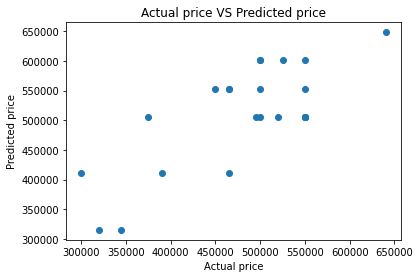

In [23]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price VS Predicted price')
plt.show

In [24]:
lr.predict([[2022]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([743601.61594504])

Lasso regression

In [25]:
y=data['Price']
X=data.drop(['Price'],axis=1)

In [26]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [27]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)

In [29]:
model=lasso.fit(X_train,y_train)
predictions=model.predict(x_test)

In [30]:
from sklearn.metrics import mean_squared_error,r2_score

In [31]:
print('Mean squared error is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

Mean squared error is: 4326859771.015669
R squared value is: 0.3675999284778446


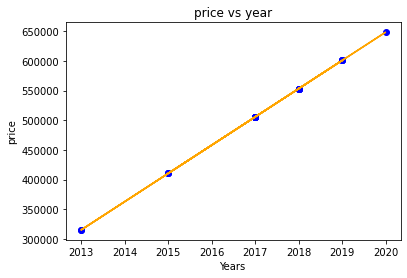

In [33]:
plt.scatter( x_test, predictions, color = 'blue' )
plt.plot( x_test, predictions, color = 'orange' )
plt.title( 'price vs year' )
plt.xlabel( 'Years ' )
plt.ylabel( 'price' )
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

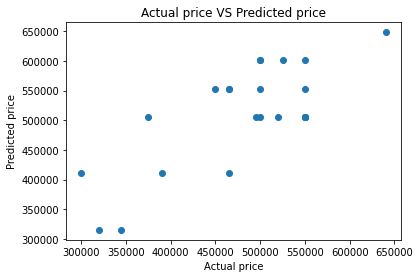

In [34]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price VS Predicted price')
plt.show